In [1]:
import csv
import sys
import time

start = time.time()

for i in range(1,2):
    try:
        f = open("./output/deg24_499_500_matrix{}.csv".format(i))
    except OSError as err:
        print("OS error: {0}".format(err))
    # except ValueError:
    #     print("Could not convert data to an integer.")
    except BaseException as err:
        print(f"Unexpected {err=}, {type(err)=}")
        raise

end = time.time()

print("Total runtime: ", (end - start))

Total runtime:  0.0009984970092773438


In [4]:
import numpy as np
import time
import csv
import pandas as pd 

def getData3(file,size):
    newData = np.empty((size,size))
    rowNum = 0
    side = int(np.sqrt(size))
    with open(file, newline='') as f:
        reader = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
        for row in reader:
            newData[rowNum] = row
            rowNum += 1
#     print("Shape:", np.shape(newData))
    return newData

def combineData(genFile,size,numFiles):
    testAll4 = getData3("./output/{}0.csv".format(genFile), (size))
    for i in range(1,numFiles+1):
        print("File number",i)
        testAll4 += getData3("./output/{}{}.csv".format(genFile,i), (size))
    print(np.shape(testAll4))
#     testAll4.tofile("./output/{}Tot.csv".format(genFile), sep = ',')
#     np.savetxt("./output/{}Tot.csv".format(genFile), testAll4, delimiter = ",")
    pd.DataFrame(testAll4).astype('int32').to_csv("./output/{}Tot.csv".format(genFile), header=None, index=None)

def combineData2():
    testAll4 = getData3("./output/pixEval_2400_500_0.csv", (2400))
    for i in range(1,46):
        testAll4 += getData3("./output/pixEval_2400_500_{}.csv".format(i), (2400))
    for i in range(92,115):
        testAll4 += getData3("./output/pixEval_2400_500_{}.csv".format(i), (2400))
    pd.DataFrame(testAll4).astype('int32').to_csv("./output/pixEval_2400_500_Tot.csv", header=None, index=None)

fileFormat = "deg24_499_500_matrix"
sideLength = 499
fileCount = 1

combineData(fileFormat,sideLength,fileCount)
# combineData2()
print("Done")

File number 1
(499, 499)
Done


Total # roots: 30216.0
Total # unique roots: 18362
Max pixel count: 234.0


<IPython.core.display.Javascript object>


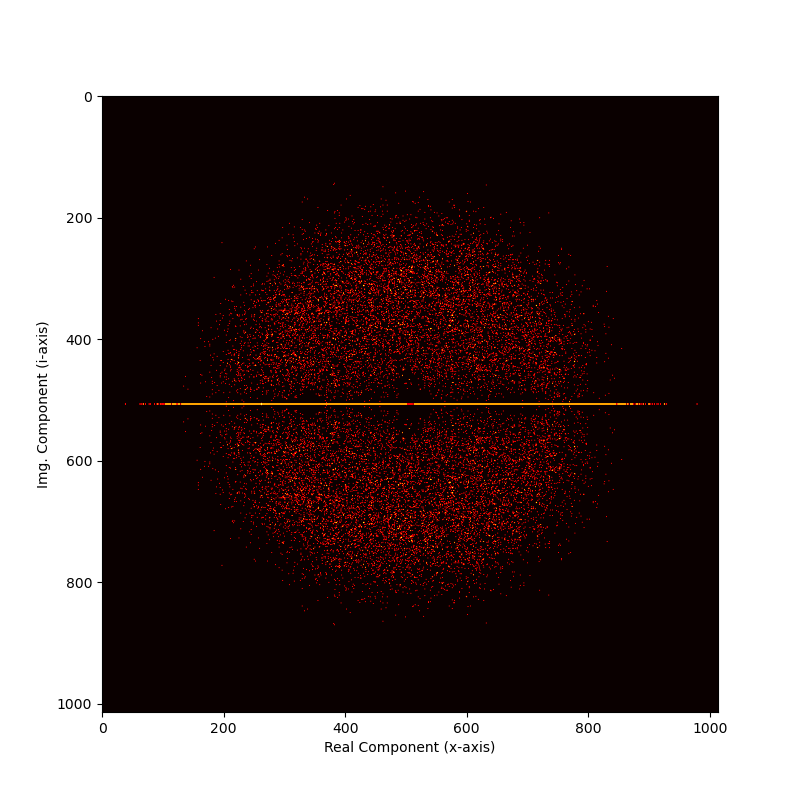

Total runtime: 0.18428279999352526


In [12]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import time
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection
import matplotlib
import random
import csv
from PIL import Image

## FILES ARE NAMED ACCORDINGLY
# test2 - 10.
# test3 - 5.
# test4 - 1.
# test5 - 0.5
# test6 - 0.1
# test7 - 0.05

# test21 - 40
# test22 - 20
# test23 - 10
# test24 - 5
# test25 - 1

start = time.perf_counter()

def getData1(file,side):
    newData = np.zeros((side*side//2))
    rowNum = 0
#     side = int(np.sqrt(size))
    with open(file, newline='') as f:
        reader = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
        for row in reader:
#             print(row)
            newData[rowNum] = row[0]
            rowNum += 1
    print("Shape:", np.shape(newData))
#     print("First Row:", newData[0])
#     print(np.sum(newData))
    newData2 = np.reshape(newData, (side,side//2))
    return np.hstack((newData2,np.fliplr(newData2)))

def getData2(file,side):
    newData = np.zeros((side*side))
    rowNum = 0
#     side = int(np.sqrt(size))
    with open(file, newline='') as f:
        reader = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
        for row in reader:
#             print(row)
            newData[rowNum] = row[0]
            rowNum += 1
    
    print("Shape:", np.shape(newData))
    newData1 = np.split(newData,2)
    
#     print("First Row:", newData[0])
#     print(np.sum(newData))
    newData2 = np.hstack((np.reshape(newData1[0], (side,side//2)), np.flipud(np.reshape(newData1[1], (side,side//2)))))
    return newData2

# def getData2(file,size):
#     newData = np.empty((size))
#     rowNum = 0
#     side = int(np.sqrt(size))
#     with open(file, newline='') as f:
#         reader = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
#         for row in reader:
# #             print(row)
#             newData[rowNum] = row[0]
#             rowNum += 1
#     print("Shape:", np.shape(newData))
# #     print("First Row:", newData[0])
# #     print(np.sum(newData))
#     newData2 = np.reshape(newData, (side,side))
#     return newData2

def getData3(file,size):
    newData = np.empty((size,size))
    rowNum = 0
    side = int(np.sqrt(size))
    with open(file, newline='') as f:
        reader = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
        for row in reader:
#             print(row)
            newData[rowNum] = row
            rowNum += 1
#     print("Shape:", np.shape(newData))
#     print("First Row:", newData[0])
#     print(np.sum(newData))
#     newData2 = np.reshape(newData, (side,side))
    return newData

def combineData2x2(data,sideLen):
    newData = np.empty((sideLen//2,sideLen//2))
    for x in range(0,sideLen//2):
        for y in range(0,sideLen//2):
            newBin = data[2*x][2*y] + data[(2*x) +1][2*y] + data[2*x][(2*y) +1] + data[(2*x) +1][(2*y) +1]
            newData[x][y] = newBin
    return newData

def combineData3x3(data,sideLen):
    newData = np.empty((sideLen//3,sideLen//3))
    for x in range(0,sideLen//3):
        for y in range(0,sideLen//3):
            newBin = data[3*x][3*y] + data[3*x][(3*y) +1] + data[3*x][(3*y) +2] \
                    +data[(3*x) +1][3*y] + data[(3*x) +1][(3*y) +1] + data[(3*x) +1][(3*y) +2]\
                    +data[(3*x) +2][3*y] + data[(3*x) +2][(3*y) +1] + data[(3*x) +2][(3*y) +2]
            newData[x][y] = newBin
    return newData

def combineData(data,sideLen,fact):
    newSide = sideLen //fact
    newSide2 = sideLen //newSide
    return data[0:sideLen,0:sideLen].reshape(newSide,newSide2,newSide,newSide2).mean(-1).mean(1)

def addUnitCircle(data,sideLen):
    halfSide = sideLen //2
    unitRad = halfSide /1.1
    for x in range(sideLen):
        for y in range(sideLen):
            xVal = (x-halfSide) **2
            yVal = (y-halfSide) **2
            rad = np.sqrt(xVal + yVal)
            if (abs(rad-unitRad) < 0.5):
                data[x][y] += 1
    return data

def removeCorners(data,sideLen):
    halfSide = (sideLen /2)
#     unitRad = halfSide /1.1
    for x in range(sideLen):
        for y in range(sideLen):
            xVal = (x-halfSide) **2
            yVal = (y-halfSide) **2
            rad = np.sqrt(xVal + yVal) + 85
            if (rad >= halfSide):
                data[x][y] = 0
    return data

def noCornersOrTwos(data,sideLen):
    halfSide = sideLen /2
#     unitRad = halfSide /1.1
    for x in range(sideLen):
        for y in range(sideLen):
            xVal = (x-halfSide) **2
            yVal = (y-halfSide) **2
            rad = np.sqrt(xVal + yVal) + 18
            if (rad >= halfSide):
                data[x][y] = 0
            else:
#                 data[x][y] = data[x][y] //2
                data[x][y] = min(data[x][y] //2, 2)
    return data

def brightRoots(data,sideLen):
    halfSide = sideLen /2
#     unitRad = halfSide /1.1
    for x in range(sideLen):
        for y in range(sideLen):
            xVal = (x-halfSide) **2
            yVal = (y-halfSide) **2
            rad = np.sqrt(xVal + yVal) + 18
            if (rad >= halfSide):
                data[x][y] = 0
            else:
                data[x][y] = data[x][y] *5
    return data

def limitMax(data, sideLen):
    halfSide = (sideLen /2)
    newData = np.zeros_like(data)
#     unitRad = halfSide /1.1
    for x in range(sideLen):
        for y in range(sideLen):
            newData[x][y] = min(data[x][y], 100)
#             xVal = (x-halfSide) **2
#             yVal = (y-halfSide) **2
#             rad = np.sqrt(xVal + yVal) + 90
#             if (rad >= halfSide):
#                 data[x][y] = 0
    return newData

def logOfData(data):
#     for x in range(sideLen):
#         for y in range(sideLen):
#             if (data[x][y] == 0):
#                 data[x][y] += 0.01
    return np.log10(data)

def blackBackground(data):
    return np.where(data != 0, data, -1)

def minSquare(data):
    return np.where(data <= 0.25, 0, data)

def rollMat(data):
    data += np.roll(data,1,axis=0) + np.roll(data,-1,axis=0)
    data += np.roll(data,1,axis=1) + np.roll(data,-1,axis=1)
#     data += np.roll(data,1,axis=0) + np.roll(data,1,axis=1) + np.roll(data,-1,axis=0) + np.roll(data,-1,axis=1)
#     newData = np.copy(data)
#     newData += np.roll(data,1,axis = 0)
#     newData += np.roll(data,1,axis = 1)
#     newData += np.roll(data,-1,axis = 0)
#     newData += np.roll(data,-1,axis = 1)
    return data

sideLength = 1014
# test = getData3("test.csv",(sideLength))
# test2 = combineData(test,sideLength,1)

# testAll = getData3("test2.csv",(sideLength))
# testAll += getData3("test3.csv",(sideLength))
# testAll += getData3("test4.csv",(sideLength))
# testAll += getData3("test5.csv",(sideLength))
# testAll += getData3("test6.csv",(sideLength))
# testAll += getData3("test7.csv",(sideLength))

# testAll2 = getData3("test21.csv",(sideLength))
# testAll2 += getData3("test22.csv",(sideLength))
# testAll2 += getData3("test23.csv",(sideLength))
# testAll2 += getData3("test24.csv",(sideLength))
# testAll2 += getData3("test25.csv",(sideLength))

# testAll3 = getData3("test30.csv", (sideLength))
# testAll3 = getData3("test31.csv", (sideLength))
# testAll3 += getData3("test32.csv", (sideLength))
# testAll3 += getData3("test33.csv", (sideLength))
# testAll3 += getData3("test34.csv", (sideLength))
# testAll3 += getData3("test35.csv", (sideLength))
# testAll3 += getData3("test36.csv", (sideLength))
# testAll3 += getData3("test37.csv", (sideLength))
# testAll3 += getData3("test38.csv", (sideLength))
# testAll3 += getData3("test39.csv", (sideLength))

# testAll4 = getData3("./output/pixEval_3600_500.csv", (sideLength))
# testAll4 -= getData3("./output/testSym0.csv", (sideLength))
# testAll4 = getData1("./output/testMin09.csv", (sideLength))
# testAll4 = getData1("./output/testMin04.csv", (sideLength))
# testAll4 = addUnitCircle(getData3("./output/test53.csv", (sideLength)),sideLength)
# testAll4 = combineData(removeCorners(getData3("./output/testMin02.csv", (sideLength)),sideLength),sideLength,2)
# testAll4 = removeCorners(getData3("./output/testMin04.csv", (sideLength)),sideLength)
# testAll4 = limitMax(getData3("./output/test58.csv", (sideLength)),sideLength)

# testAll4 = logOfData(removeCorners(getData3("./output/test593.csv", (sideLength)),sideLength))

# testAll4 = combineData(removeCorners(getData3("./output/testMin00.csv", (sideLength)),sideLength),sideLength,2)
# testAll4 += combineData(removeCorners(getData3("./output/testMax00.csv", (sideLength)),sideLength),sideLength,2)
# testAll4 = removeCorners(getData3("./output/pixEval_3600_500.csv", (sideLength)),sideLength)
# testAll4 = getData3("./output/pixEval_600_5000_zoom0.csv", (sideLength))
testAll4 = np.swapaxes(getData3("./output/deg24_1014_2000_matrix1.csv", (sideLength)), 0,1)
# testAll20 = combineData(getData3("./output/pixEval_600_5000_thirdZoomTot.csv", (600)),600,8)


# testAll4 += getData3("./output/deg20_2399_1000_axesTot.csv", (sideLength))
# testAll0 = getData3("./output/deg20_2399_1000_axesTot.csv", (sideLength))
# testAll4 += getData3("./output/pixEval_600_500_2.csv", (sideLength))
# # testAll4 += getData3("./output/pixEval_990_500_zoom2.csv", (sideLength))
# for i in range(1,184):
#     testAll2 = getData3("./output/pixEval_600_5000_zoom{}.csv".format(i), (sideLength))
#     print(i, np.sum(np.where(testAll4 - testAll2 == -1, 1,0)))
#     testAll4 += getData3("./output/pixEval_600_5000_zoom{}.csv".format(i), (sideLength))
# #     testAll4 += getData3("./output/pixEval_600_5000_zoom{}.csv".format(i), (sideLength))
    
# testAll21 = combineData(getData3("./output/pixEval_600_5000_zoomTot.csv", (600)),600,8)
# testAll6 = getData3("./output/pixEval_600_5000_secondZoom0.csv", (600))
# for i in range(1,23):
#     testAll6 += getData3("./output/pixEval_600_5000_secondZoom{}.csv".format(i), (600))

# testAll4 = (getData1("./output/pixEval_1800_4000.csv", (sideLength)) *5)

# testAll4 = getData3("./output/testMin14.csv", (sideLength))
# testAll4 = removeCorners(getData3("./output/testMax00.csv", (sideLength)),sideLength)
# testAll4 += removeCorners(getData3("./output/testMin00.csv", (sideLength)),sideLength)

# testAll4 += brightRoots(getData3("./output/test55.csv", (sideLength)),sideLength)

# testAll4 = removeCorners(getData3("./output/test55.csv", (sideLength)),sideLength)
# testAll4 = removeCorners(getData3("./output/test59.csv", (sideLength)),sideLength)
# testAll4 = removeCorners(getData3("./output/test593.csv", (sideLength)),sideLength)

# testAll4 = combineData(removeCorners(getData3("./output/test56.csv", (sideLength)),sideLength),sideLength,1)
# testAll4 = minSquare(testAll4)
# testAll4 = blackBackground(testAll4)

# testAll3 = combineData(testAll4,sideLength,3)
# testAll5 = np.repeat(np.repeat(testAll4,8,axis=0),8,axis=1)
# testAll7 = testAll4
# for i in range(413,488):
#     for j in range(1163,1238):
#         testAll7[j][i] = testAll21[j-1163][i-413]
# # print(np.shape(testAll5))

# for i in range(3300,3900):
#     for j in range(9300,9900):
#         testAll5[j][i] = testAll21[j-9300][i-3300]
        
# for i in range(15300,15900):
#     for j in range(9300,9900):
#         testAll5[j][i] = testAll21[9900-j-1][i-15300]

# for i in range(7500,8100):
#     for j in range(12900,13500):
#         testAll5[j][i] = testAll20[j-12900][7500-i-1]

# one = np.sum(np.where(testAll4 == 1, 1,0))
# two = np.sum(np.where(testAll4 == 2, 1,0))
# three = np.sum(np.where(testAll4 == 3, 1,0))
# four = np.sum(np.where(testAll4 == 4, 1,0))
# five = np.sum(np.where(testAll4 == 5, 1,0))
# six = np.sum(np.where(testAll4 == 6, 1,0))
# seven = np.sum(np.where(testAll4 == 7, 1,0))
# eight = np.sum(np.where(testAll4 >= 10, 1,0))
# nine = np.sum(np.where(testAll4 >= 20, 1,0))
# ten = np.sum(np.where(testAll4 >= 30, 1,0))

print("Total # roots:", np.sum(testAll4))
print("Total # unique roots:", np.sum(np.where(testAll4 >= 1, 1,0)))
# print("1 root per pixel:", one)
# print("2 roots per pixel:", two)
# print("3 roots per pixel:", three)
# print("4 roots per pixel:", four)
# print("5 roots per pixel:", five)
# print("6 roots per pixel:", six)
# print("7 roots per pixel:", seven)
# print("8 roots per pixel:", eight)
# print("9 roots per pixel:", nine)
# print("10 roots per pixel:", ten)
print("Max pixel count:", np.amax(testAll4))

# testAll2 = combineData(testAll5,19200,4)
# testAll = test2 +test3

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
ax.set_xlabel('Real Component (x-axis)')
ax.set_ylabel('Img. Component (i-axis)')
# ax.set_title('Plot 3: Root values are circled') 

# axes.set_aspect( 1 ) 
# ax2 = fig.add_subplot(122)
# plt.axis('off')

# display(testAll4)

# ax.plot(x, y, color='black',linewidth=10)
# ax.imshow(((np.where(testAll4 !=2, 0, 1))), cmap='hot', interpolation=None)
# ax.imshow((rollMat(testAll4)), cmap='hot', interpolation=None)

# print(type(testAll4))
# data = Image.fromarray(np.where(testAll4 !=0, testAll4 *100, 0))
# data = data.convert("L")
# data.save('testPIL.png')
# data.show()
    
# rootIndices = np.argwhere(np.swapaxes(testAll0,0,1)>=1)
# for inds in rootIndices:
#     ax.add_patch(plt.Circle(inds, radius=3, edgecolor='b',lw=2, fill=False))

# testAll4 += removeCorners(getData3("./output/pixEval_1800_500.csv", (sideLength)),sideLength)

# , extent=[-1.6,1.6,-1.6,1.6]
# ax.imshow(np.swapaxes(testAll4,0,1), extent=[-1.4,1.4,-1.4,1.4], interpolation=None)
ax.imshow(np.where(testAll4 >1, 1, testAll4), cmap='hot', interpolation=None)
# ax.imshow(np.swapaxes(np.where(testAll4 >= 1, 1,testAll4), 0,1), extent=[-0.05,0.05,0.95,1.05], cmap='hot', interpolation=None)
# ax.imshow(np.swapaxes(np.where(testAll4 >=3, 3,testAll4), 0,1), cmap='hot', interpolation=None)
# ax.imshow(np.swapaxes(np.where(testAll2 >= 1, 1,testAll2), 0,1), cmap='hot', interpolation=None)
# ax.grid(color='w', linestyle='-', linewidth=.5)

# ax2.imshow(testAll2)
# plt.savefig('./images/plot_grid.png', dpi = 600, bbox_inches='tight', pad_inches=.1)


end = time.perf_counter()

print("Total runtime:", (end-start))

Total # roots: 244464.0
Total # unique roots: 218496
Max pixel count: 586.0


<IPython.core.display.Javascript object>


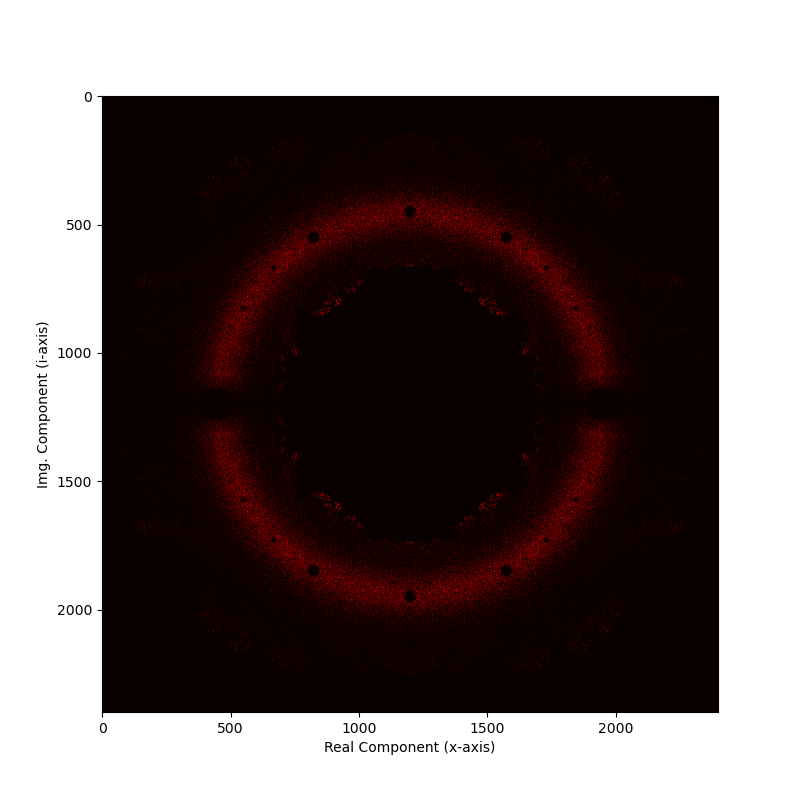

Total runtime: 0.8907462000061059


In [4]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import time
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection
import matplotlib
import random
import csv
from PIL import Image

## FILES ARE NAMED ACCORDINGLY
# test2 - 10.
# test3 - 5.
# test4 - 1.
# test5 - 0.5
# test6 - 0.1
# test7 - 0.05

# test21 - 40
# test22 - 20
# test23 - 10
# test24 - 5
# test25 - 1

start = time.perf_counter()

def getData1(file,side):
    newData = np.zeros((side*side//2))
    rowNum = 0
#     side = int(np.sqrt(size))
    with open(file, newline='') as f:
        reader = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
        for row in reader:
#             print(row)
            newData[rowNum] = row[0]
            rowNum += 1
    print("Shape:", np.shape(newData))
#     print("First Row:", newData[0])
#     print(np.sum(newData))
    newData2 = np.reshape(newData, (side,side//2))
    return np.hstack((newData2,np.fliplr(newData2)))

def getData2(file,side):
    newData = np.zeros((side*side))
    rowNum = 0
#     side = int(np.sqrt(size))
    with open(file, newline='') as f:
        reader = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
        for row in reader:
#             print(row)
            newData[rowNum] = row[0]
            rowNum += 1
    
    print("Shape:", np.shape(newData))
    newData1 = np.split(newData,2)
    
#     print("First Row:", newData[0])
#     print(np.sum(newData))
    newData2 = np.hstack((np.reshape(newData1[0], (side,side//2)), np.flipud(np.reshape(newData1[1], (side,side//2)))))
    return newData2

# def getData2(file,size):
#     newData = np.empty((size))
#     rowNum = 0
#     side = int(np.sqrt(size))
#     with open(file, newline='') as f:
#         reader = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
#         for row in reader:
# #             print(row)
#             newData[rowNum] = row[0]
#             rowNum += 1
#     print("Shape:", np.shape(newData))
# #     print("First Row:", newData[0])
# #     print(np.sum(newData))
#     newData2 = np.reshape(newData, (side,side))
#     return newData2

def getData3(file,size):
    newData = np.empty((size,size))
    rowNum = 0
    side = int(np.sqrt(size))
    with open(file, newline='') as f:
        reader = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
        for row in reader:
#             print(row)
            newData[rowNum] = row
            rowNum += 1
#     print("Shape:", np.shape(newData))
#     print("First Row:", newData[0])
#     print(np.sum(newData))
#     newData2 = np.reshape(newData, (side,side))
    return newData

def combineData2x2(data,sideLen):
    newData = np.empty((sideLen//2,sideLen//2))
    for x in range(0,sideLen//2):
        for y in range(0,sideLen//2):
            newBin = data[2*x][2*y] + data[(2*x) +1][2*y] + data[2*x][(2*y) +1] + data[(2*x) +1][(2*y) +1]
            newData[x][y] = newBin
    return newData

def combineData3x3(data,sideLen):
    newData = np.empty((sideLen//3,sideLen//3))
    for x in range(0,sideLen//3):
        for y in range(0,sideLen//3):
            newBin = data[3*x][3*y] + data[3*x][(3*y) +1] + data[3*x][(3*y) +2] \
                    +data[(3*x) +1][3*y] + data[(3*x) +1][(3*y) +1] + data[(3*x) +1][(3*y) +2]\
                    +data[(3*x) +2][3*y] + data[(3*x) +2][(3*y) +1] + data[(3*x) +2][(3*y) +2]
            newData[x][y] = newBin
    return newData

def combineData(data,sideLen,fact):
    newSide = sideLen //fact
    newSide2 = sideLen //newSide
    return data[0:sideLen,0:sideLen].reshape(newSide,newSide2,newSide,newSide2).mean(-1).mean(1)

def addUnitCircle(data,sideLen):
    halfSide = sideLen //2
    unitRad = halfSide /1.1
    for x in range(sideLen):
        for y in range(sideLen):
            xVal = (x-halfSide) **2
            yVal = (y-halfSide) **2
            rad = np.sqrt(xVal + yVal)
            if (abs(rad-unitRad) < 0.5):
                data[x][y] += 1
    return data

def removeCorners(data,sideLen):
    halfSide = (sideLen /2)
#     unitRad = halfSide /1.1
    for x in range(sideLen):
        for y in range(sideLen):
            xVal = (x-halfSide) **2
            yVal = (y-halfSide) **2
            rad = np.sqrt(xVal + yVal) + 85
            if (rad >= halfSide):
                data[x][y] = 0
    return data

def noCornersOrTwos(data,sideLen):
    halfSide = sideLen /2
#     unitRad = halfSide /1.1
    for x in range(sideLen):
        for y in range(sideLen):
            xVal = (x-halfSide) **2
            yVal = (y-halfSide) **2
            rad = np.sqrt(xVal + yVal) + 18
            if (rad >= halfSide):
                data[x][y] = 0
            else:
#                 data[x][y] = data[x][y] //2
                data[x][y] = min(data[x][y] //2, 2)
    return data

def brightRoots(data,sideLen):
    halfSide = sideLen /2
#     unitRad = halfSide /1.1
    for x in range(sideLen):
        for y in range(sideLen):
            xVal = (x-halfSide) **2
            yVal = (y-halfSide) **2
            rad = np.sqrt(xVal + yVal) + 18
            if (rad >= halfSide):
                data[x][y] = 0
            else:
                data[x][y] = data[x][y] *5
    return data

def limitMax(data, sideLen):
    halfSide = (sideLen /2)
    newData = np.zeros_like(data)
#     unitRad = halfSide /1.1
    for x in range(sideLen):
        for y in range(sideLen):
            newData[x][y] = min(data[x][y], 100)
#             xVal = (x-halfSide) **2
#             yVal = (y-halfSide) **2
#             rad = np.sqrt(xVal + yVal) + 90
#             if (rad >= halfSide):
#                 data[x][y] = 0
    return newData

def logOfData(data):
#     for x in range(sideLen):
#         for y in range(sideLen):
#             if (data[x][y] == 0):
#                 data[x][y] += 0.01
    return np.log10(data)

def blackBackground(data):
    return np.where(data != 0, data, -1)

def minSquare(data):
    return np.where(data <= 0.25, 0, data)

def rollMat(data):
    data += np.roll(data,1,axis=0) + np.roll(data,-1,axis=0)
    data += np.roll(data,1,axis=1) + np.roll(data,-1,axis=1)
#     data += np.roll(data,1,axis=0) + np.roll(data,1,axis=1) + np.roll(data,-1,axis=0) + np.roll(data,-1,axis=1)
#     newData = np.copy(data)
#     newData += np.roll(data,1,axis = 0)
#     newData += np.roll(data,1,axis = 1)
#     newData += np.roll(data,-1,axis = 0)
#     newData += np.roll(data,-1,axis = 1)
    return data

sideLength = 2399

testAll4 = np.swapaxes(getData3("./output/deg24_2399_500_pixels2.csv", (sideLength)), 0,1)

# testAll3 = combineData(testAll4,sideLength,3)
# testAll5 = np.repeat(np.repeat(testAll4,8,axis=0),8,axis=1)
# testAll7 = testAll4
# for i in range(413,488):
#     for j in range(1163,1238):
#         testAll7[j][i] = testAll21[j-1163][i-413]
# # print(np.shape(testAll5))

# for i in range(3300,3900):
#     for j in range(9300,9900):
#         testAll5[j][i] = testAll21[j-9300][i-3300]
        
# for i in range(15300,15900):
#     for j in range(9300,9900):
#         testAll5[j][i] = testAll21[9900-j-1][i-15300]

# for i in range(7500,8100):
#     for j in range(12900,13500):
#         testAll5[j][i] = testAll20[j-12900][7500-i-1]

print("Total # roots:", np.sum(testAll4))
print("Total # unique roots:", np.sum(np.where(testAll4 >= 1, 1,0)))
print("Max pixel count:", np.amax(testAll4))

# testAll2 = combineData(testAll5,19200,4)
# testAll = test2 +test3

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
ax.set_xlabel('Real Component (x-axis)')
ax.set_ylabel('Img. Component (i-axis)')
# ax.set_title('Plot 3: Root values are circled') 

# axes.set_aspect(1) 
# plt.axis('off')

# , extent=[-1.6,1.6,-1.6,1.6]
# ax.imshow(np.swapaxes(testAll4,0,1), extent=[-1.4,1.4,-1.4,1.4], interpolation=None)
ax.imshow(np.where(testAll4 >3, 3, testAll4), cmap='hot', interpolation=None)
# ax.imshow(np.swapaxes(np.where(testAll4 >= 1, 1,testAll4), 0,1), extent=[-0.05,0.05,0.95,1.05], cmap='hot', interpolation=None)
# ax.imshow(np.swapaxes(np.where(testAll4 >=3, 3,testAll4), 0,1), cmap='hot', interpolation=None)
# ax.imshow(np.swapaxes(np.where(testAll2 >= 1, 1,testAll2), 0,1), cmap='hot', interpolation=None)
# ax.grid(color='w', linestyle='-', linewidth=.5)

# plt.savefig('./images/plot_grid.png', dpi = 600, bbox_inches='tight', pad_inches=.1)


end = time.perf_counter()

print("Total runtime:", (end-start))

In [50]:
from PIL import Image
from numpy import linspace, array, fromfunction, sin, cos
from matplotlib import cm


# scale array between vmin and vmax and encode it to uint8 (256 values)
def scale(arr, vmin, vmax):
    return (255*(arr - vmin)/(vmax - vmin)).clip(0, 255).astype('uint8')

# convert a matplotlib colormap into a PIL palette
# def getpalette(cmap):
#     return (255*array(map(lambda x: cmap(x)[0:3], linspace(0., 1.,256))).ravel()).astype('int')


# a sample array
data = fromfunction(lambda i,j: cos((i+j)/50)*sin(i/50.), (200, 300), dtype='float')

# convert the float array to a PIL image
im = Image.fromarray(scale(data, 0, 1))
# im.putpalette(getpalette(cm.jet))
# im.save('testPIL.png') # or 
im.show()

In [24]:
# Python program to read
# image using matplotlib
 
# importing matplotlib modules
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
 
# Read Images
# img = mpimg.imread('polyRoots.png')
# print(np.shape(img))
# display(img)
dim = 16263 * 23000
img2 = np.reshape(img,(dim,4)).T
print(np.shape(img2))
display(img2)
# print(np.sum(img2[0]))
# print(np.sum(img2[1]))
# print(np.sum(img2[2]))
going = True
ind = 0
check1 = 0
# while (check1 <5):
#     if (img2[2][ind] > 0.):
#         print(img2[0][ind], img2[1][ind], img2[2][ind])
# #         print(img2[1][ind])
# #         print(img2[2][ind])
#         check1 +=1
# #         going = False
#     ind +=1
print(np.unique(img2[0]))
print(np.unique(img2[1]))
# Output Images
# plt.imshow(img)

(4, 374049000)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)

[0.         0.47058824 0.7607843  0.8666667  0.92941177 0.972549
 0.99215686 0.99607843 1.        ]
[0.         0.05490196 0.11764706 0.19215687 0.30588236 0.42745098
 0.56078434 0.654902   0.7411765  1.        ]
